In [11]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Drops specific values in a dataframe
# if flag = 1, drops values less than 'val'
# if flag = 0, drops values greater than 'val'
def drop_values(dataframe, column, val, flag):
    if flag:
        return dataframe.drop(dataframe[column < val].index)
    else:
        return dataframe.drop(dataframe[column > val].index)
   
    
# EGG1 DATASET 
dataframe = pd.read_pickle('data/EGG1_DATASET.pkl')
dataframe

,Temperature[degC],Humidity[percent],PM1.0[ug/m^3],PM2.5[ug/m^3],PM10.0[ug/m^3],O3[ppb],O3[V],NO2[ppb],NO2[V],Pressure[Pa],NO,NO2,NOx,O3,PM10_conc,PM10-2.5_conc,PM2.5_conc,Air_Pressure,Air_Temperature,Relative_Humidity
Timestamp,,,,,,,,,,,,,,,,,,,,
2020-05-06 13:00:00,20.520000,20.116667,3.166667,3.666667,4.000000,142.300000,1.421641,1935.236667,1.410120,99261.900000,1.646,3.425,5.072,38.173,13.570,9.732,3.834,991.865,12.071,29.295
2020-05-06 14:00:00,17.968333,24.757292,13.868750,15.925000,16.810417,63.958958,1.423080,263.038333,1.422146,99264.718750,1.397,3.086,4.483,39.447,14.779,10.735,4.045,991.566,12.162,29.102
2020-05-06 15:00:00,22.348833,19.432667,1.673333,2.333333,2.475000,60.012667,1.423583,95.994500,1.423568,99188.643333,1.237,2.699,3.905,40.509,12.838,8.890,3.945,991.147,12.286,28.184
2020-05-06 16:00:00,22.438667,18.594000,1.186667,1.920000,2.090000,61.118000,1.423567,56.341500,1.423861,99138.068333,1.490,3.941,5.639,40.473,15.705,11.404,4.303,990.687,12.375,27.602
2020-05-06 17:00:00,22.471500,18.093833,1.471667,2.248333,2.441667,62.872167,1.423533,49.240500,1.423915,99108.190000,1.910,5.132,6.875,40.592,19.672,15.035,4.628,990.413,12.848,26.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-02 05:00:00,22.295667,77.541000,6.738333,9.838333,10.160000,39.836167,1.424001,150.701333,1.423165,98775.058333,1.121,8.162,9.292,17.731,9.885,5.034,4.847,986.623,19.764,91.640
2020-09-02 06:00:00,22.626833,76.722500,6.543333,9.490000,9.821667,40.159333,1.424025,153.693000,1.423159,98737.496667,5.220,11.060,16.392,12.617,9.391,4.642,4.751,986.224,19.976,91.219
2020-09-02 07:00:00,23.141667,76.450667,6.051667,8.883333,9.171667,39.539167,1.424094,153.420833,1.423186,98672.236667,2.313,10.186,12.571,13.036,9.967,5.233,4.733,985.630,20.552,90.004


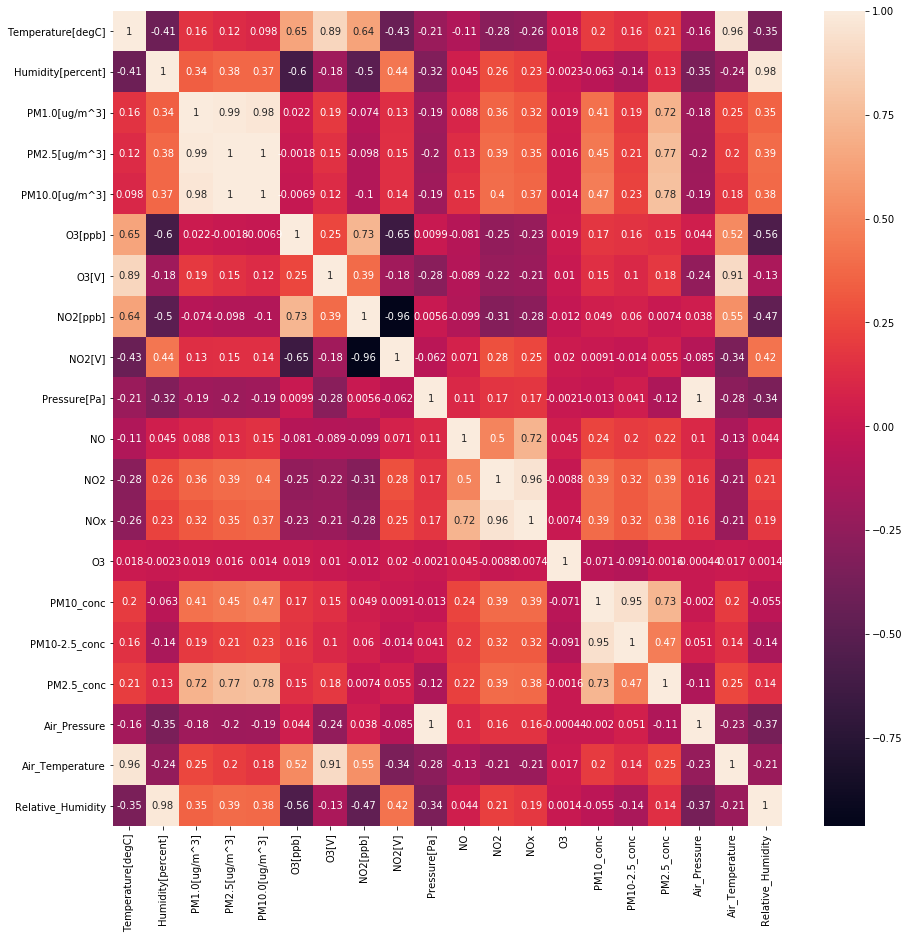

In [8]:
corrMatrix = dataframe.corr()
plt.subplots(figsize=(15,15))
sn.heatmap(egg1_corrMatrix, annot=True)
plt.show()

0.9304063398006959

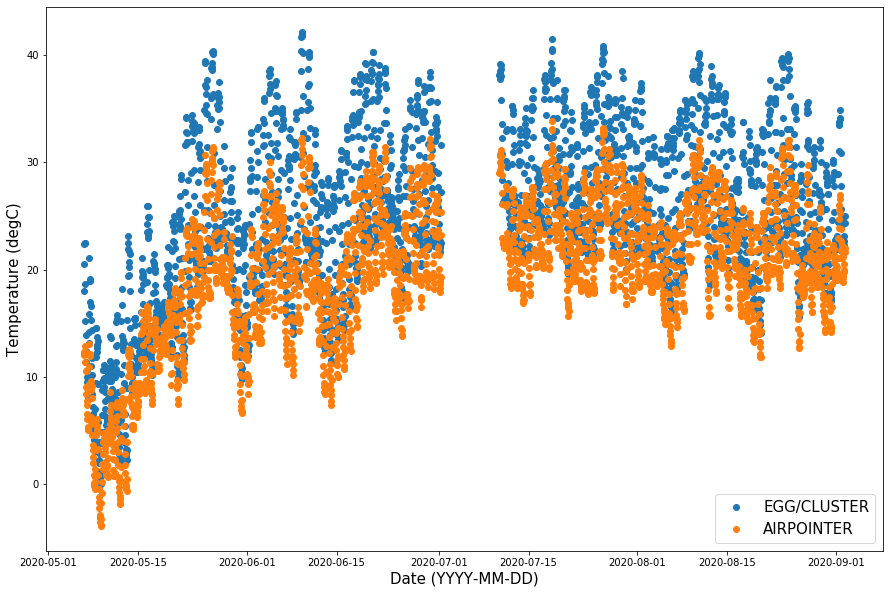

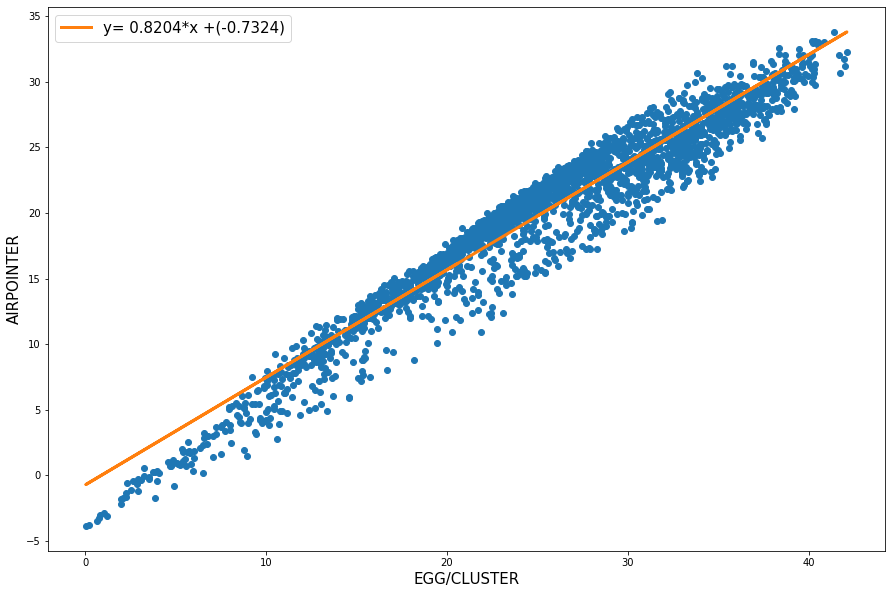

In [15]:
# ----------------------------- TEMPERATURE FROM CLUSTER vs. AIR_TEMPERATURE FROM AIRPOINTER ----------------------------------------
plt.figure(figsize=(15,10))
plt.plot(dataframe.index.to_series(), dataframe['Temperature[degC]'], 'o', label="EGG/CLUSTER")
plt.plot(dataframe.index.to_series(), dataframe['Air_Temperature'], 'o', label='AIRPOINTER')
plt.xlabel('Date (YYYY-MM-DD)', fontsize=15)
plt.ylabel('Temperature (degC)', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate a regression line
# Egg sensor
xValues = dataframe['Temperature[degC]'].to_numpy()
# Airpointer
yValues = dataframe['Air_Temperature'].to_numpy()
# Regression Line
linear_regression = LinearRegression().fit(xValues.reshape(-1,1), yValues)
# Plot the values graph with the regression line
plt.figure(figsize=(15,10))
plt.plot(xValues, yValues, 'o')
plt.plot(xValues, 
         linear_regression.predict(xValues.reshape(-1,1)),
         label='y= {:0.4f}*x +({:0.4f})'.format(linear_regression.coef_[0], linear_regression.intercept_),
         linewidth=3)
plt.xlabel('EGG/CLUSTER', fontsize=15)
plt.ylabel('AIRPOINTER', fontsize=15)
plt.legend(loc='best', fontsize=15)

# Calculate the R2 score
metrics.r2_score(yValues, linear_regression.predict(xValues.reshape(-1,1)))